# Challenge - Diabetes Classification
## Diabetes Challenge!
## Machine Learning in Health
Diabetes is a condition that impairs the body's ability to process blood glucose, otherwise known as blood sugar. In the United States, the estimated number of people over 18 years of age with diagnosed and undiagnosed diabetes is 30.2 million. The figure represents between 27.9 and 32.7 percent of the population.

Without ongoing, careful management, diabetes can lead to a buildup of sugars in the blood, which can increase the risk of dangerous complications, including stroke and heart disease.

Different kinds of diabetes can occur, and managing the condition depends on the type. Not all forms of diabetes stem from a person being overweight or leading an inactive lifestyle. In fact, some are present from childhood.

## Challenge

- In this problem you are given a Diabetes Data set consisting of following features -

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

and your task is to predict whether a person is suffering from diabetes or not (Binary Classification)

### Task

- Plot a bar graph showing number of classes and no of examples in each class.

- Classification Task, classify a person as 0 or 1 (Diabetic or Not) using K-Nearest Neighbors classifier.

Download the training data set and submit your predictions as .csv for the Test cases given below. Sample Output file is provided


-- akshatkumar8896@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 20)

In [3]:
df = pd.read_csv('Diabetes_XTrain.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
5,7,100,0,0,0,30.0,0.484,32
6,4,110,66,0,0,31.9,0.471,29
7,1,111,86,19,0,30.1,0.143,23
8,3,169,74,19,125,29.9,0.268,31
9,1,71,62,0,0,21.8,0.416,26


In [60]:
df.loc[df['Insulin'] == 0, 'Insulin'] = int(df['Insulin'].mean())

df.loc[df['SkinThickness']==0, 'SkinThickness'] = int(df['SkinThickness'].mean())

df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = int(df['BloodPressure'].mean())

In [63]:
mu = df.mean()
sig = df.std()
df = (df - mu)/ sig

In [5]:
y = pd.read_csv('Diabetes_YTrain.csv')
y.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [6]:
classes = np.unique(y)
classes

array([0, 1], dtype=int64)

In [7]:
examples = []
examples.append(len(y[y['Outcome'] == 0]))
examples.append(len(y[y['Outcome'] == 1]))

In [8]:
type(examples)

list

## Plotting a bar Graph

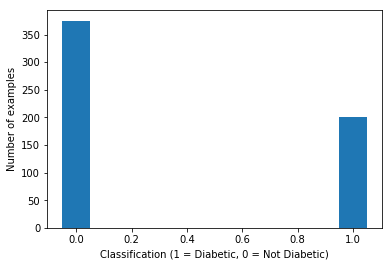

In [9]:

plt.bar(classes, examples, width=0.1)
plt.ylabel('Number of examples')
plt.xlabel('Classification (1 = Diabetic, 0 = Not Diabetic)')

plt.show()

## Classification Task

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
X = df.values
Y = pd.read_csv('Diabetes_YTrain.csv').values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # 70% training and 30% test

In [13]:
X_train.shape

(460, 8)

In [19]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## Finding the prediction on total data

In [20]:
df = pd.read_csv('Diabetes_Xtest.csv')
X_test = df.values

In [21]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [22]:
sol = pd.DataFrame(data = y_pred, columns = ['Outcome'])
sol.to_csv("y_pred.csv", index=False)

In [23]:
df1 = pd.read_csv('y_pred.csv')
df1.head()

,Outcome
0,1
1,0
2,0
3,0
4,0
